In [1]:
import pandas as pd
df = pd.read_csv('cancer_vector (2).csv', encoding='latin-1')
df.head()


,Unnamed: 0,NÃºmero,Tipo,Sintomas,vector,Tsne1,Tsne2
0,0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,[-1.06596760e-01 5.80921173e-01 -4.28065211e-...,-104.02792,61.735740
1,1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",[-5.8546865e-01 3.8960114e-01 -1.3891667e-01 ...,21.38449,128.751720
2,2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis Ã¯Â¬...,[-0.21331267 0.17683053 -0.54942524 0.331271...,-134.69463,-12.627223
3,3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,[-0.3172429 0.3133208 -0.6944022 0.384050...,-139.87105,-18.094023
4,4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,[-1.83806419e-01 9.13065597e-02 -5.11911035e-...,-91.40909,17.405632


In [2]:
import numpy as np
def vectorize(x):
  if isinstance(x, float):
    x = str(x)
  x = x.replace('\xa0', ' ')
  return np.fromstring(
      x.replace('\n', '')
       .replace('[', '')
       .replace(']', '')
       .replace('  ', ' '), sep=' ')
df['vector'] = df['vector'].apply(vectorize)

In [50]:
from sklearn.manifold import TSNE
X = df['vector']
X = np.concatenate(X).reshape(-1, 300)
modelo = TSNE(n_components=2, random_state=0)
resultado = modelo.fit_transform(X)
df['Tsne1'] = resultado[:,0]
df['Tsne2'] = resultado[:,1]
df.head()

,Unnamed: 0,NÃºmero,Tipo,Sintomas,vector,Tsne1,Tsne2
0,0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,"[-0.10659676, 0.580921173, -0.428065211, 0.049...",-104.054222,61.832588
1,1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...","[-0.58546865, 0.38960114, -0.13891667, 0.35993...",21.464697,128.628769
2,2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis Ã¯Â¬...,"[-0.21331267, 0.17683053, -0.54942524, 0.33127...",-133.229919,-12.249445
3,3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,"[-0.3172429, 0.3133208, -0.6944022, 0.3840505,...",-138.871216,-17.489887
4,4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,"[-0.183806419, 0.0913065597, -0.511911035, 0.6...",-91.905434,18.829151


In [4]:
from sklearn.model_selection import train_test_split
X = df['vector']
X = np.concatenate(X, axis = 0).reshape(-1, 300)
X_train, X_test, y_train, y_test = train_test_split(X, df['Tipo'], test_size=0.2, random_state=42)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

pipeline_logistic_regression = Pipeline([('logistic_regression', LogisticRegression())])
pipeline_svm = Pipeline([('svm', SVC())])

params_logistic_regression = {
    'logistic_regression__C': [0.1, 1, 10],  # Ajusta estos valores según sea necesario
    'logistic_regression__penalty': ['l1', 'l2'],
}
params_svm = {'svm__C': [1, 10, 100]}
grid_svm = GridSearchCV(pipeline_svm, params_svm, cv=10, n_jobs=-1)
grid_search_logistic_regression = GridSearchCV(pipeline_logistic_regression, params_logistic_regression, cv=5)


In [6]:
modelo = grid_search_logistic_regression.fit(X_train, y_train)

c:\Users\aguas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\aguas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

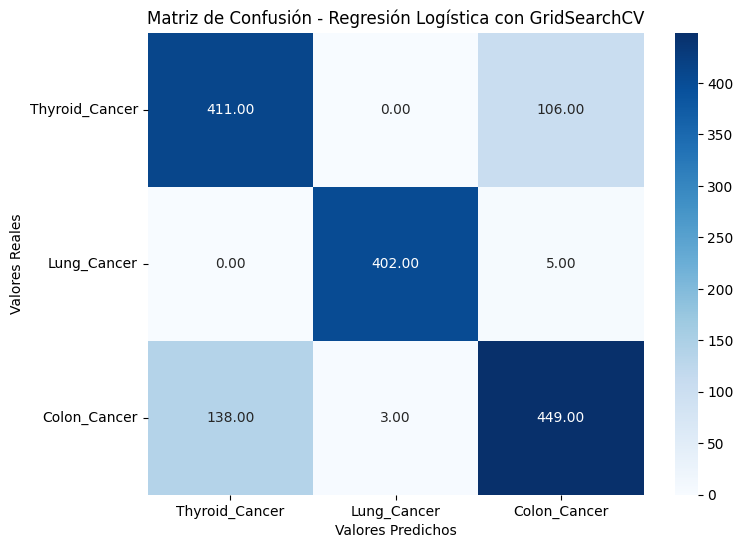

Precisión Total del Modelo: 0.8336
Precisión para Thyroid_Cancer: 0.7486
Precisión para Lung_Cancer: 0.9926
Precisión para Colon_Cancer: 0.8018


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = modelo.predict(X_test)

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de las categorías
categories = ['Thyroid_Cancer', 'Lung_Cancer','Colon_Cancer']

# Crea el heatmap con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')

# Añade título y etiquetas a los ejes
plt.title('Matriz de Confusión - Regresión Logística con GridSearchCV')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=categories)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=categories, rotation=0)

plt.show()

from sklearn.metrics import accuracy_score, precision_score

# Calcula la precisión total del modelo
total_accuracy = accuracy_score(y_test, y_pred)

# Calcula la precisión por categoría
class_precisions = precision_score(y_test, y_pred, average=None)

print(f"Precisión Total del Modelo: {total_accuracy:.4f}")

for i, category in enumerate(categories):
    print(f"Precisión para {category}: {class_precisions[i]:.4f}")


In [57]:
modelo = grid_svm.fit(X_train, y_train)

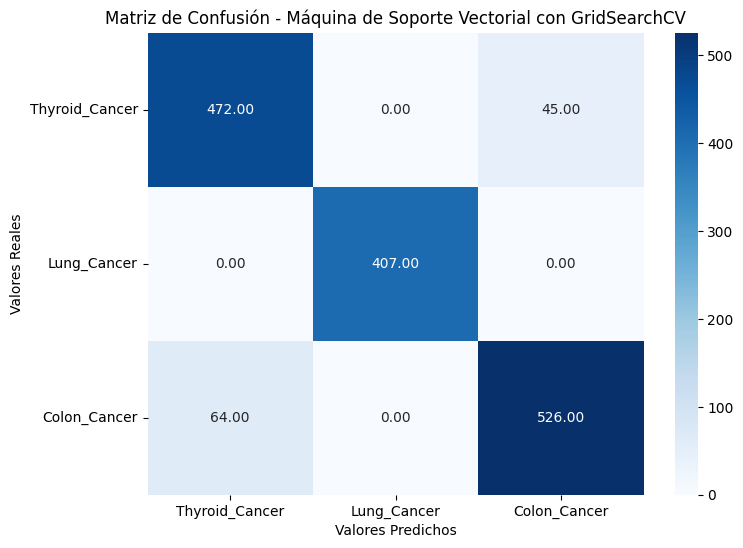

Precisión Total del Modelo: 0.9280
Precisión para Thyroid_Cancer: 0.8806
Precisión para Lung_Cancer: 1.0000
Precisión para Colon_Cancer: 0.9212


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = modelo.predict(X_test)

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de las categorías
categories = ['Thyroid_Cancer', 'Lung_Cancer','Colon_Cancer']

# Crea el heatmap con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')

# Añade título y etiquetas a los ejes
plt.title('Matriz de Confusión - Máquina de Soporte Vectorial con GridSearchCV')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=categories)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=categories, rotation=0)

plt.show()

from sklearn.metrics import accuracy_score, precision_score

# Calcula la precisión total del modelo
total_accuracy = accuracy_score(y_test, y_pred)

# Calcula la precisión por categoría
class_precisions = precision_score(y_test, y_pred, average=None)

print(f"Precisión Total del Modelo: {total_accuracy:.4f}")

for i, category in enumerate(categories):
    print(f"Precisión para {category}: {class_precisions[i]:.4f}")


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from utilidades import vectorize

In [61]:
def clean_vectorize(text):
    vector = vectorize(text)
    vector = vector.reshape(-1,300)
    return vector
transformer = FunctionTransformer(clean_vectorize)

In [63]:
pipeline_exportacion = Pipeline([
    ('preprocessing', transformer),
    ('model', modelo)
])

In [66]:
import joblib
joblib.dump(pipeline_exportacion,'grid.pkl')

['grid.pkl']